In [1]:
from sklearn.decomposition import PCA ,KernelPCA
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans,AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

dpi=90
pca_kernel='poly'#'rbf'#'linear'

In [2]:
images = dict(np.load("extracted_images_BT474.npz"))
images = images['arr_0']
X_orig = np.reshape(images, (images.shape[0], images.shape[1]*images.shape[2]) )
print (X_orig.shape)

(1425, 3136)


Text(0, 0.5, 'cumulative explained variance')

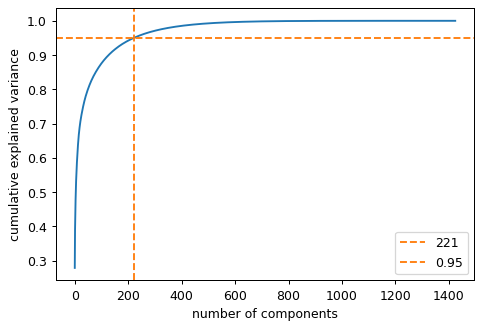

In [4]:
pca = PCA().fit(X_orig)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_comps = np.arange(len(cumsum))

chosen_percentile = 0.95
chosen_n_comp = np.min(n_comps[cumsum>=chosen_percentile])

plt.figure(dpi=dpi)
plt.plot(n_comps,cumsum,c='C0')
plt.axvline(x=chosen_n_comp,ls='--',c='C1',label=str(chosen_n_comp))
plt.axhline(y=chosen_percentile,ls='--',c='C1',label=str(chosen_percentile))
plt.legend()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
pca = PCA(n_components=chosen_n_comp)

X = pca.fit_transform(X_orig)

print (X.shape)

(1425, 221)


In [9]:
kernelpca = KernelPCA(n_components=chosen_n_comp, kernel='poly')
X = kernelpca.fit_transform(X_orig)

In [12]:
range_n_clusters = [2,3,4,5]

For n_clusters = 2 The average silhouette_score is : 0.27570499823454
For n_clusters = 3 The average silhouette_score is : 0.289944293530313
For n_clusters = 4 The average silhouette_score is : 0.29462101138609686
For n_clusters = 5 The average silhouette_score is : 0.20966089380699096
For n_clusters = 10 The average silhouette_score is : 0.19168669804492292
For n_clusters = 15 The average silhouette_score is : 0.1658797563169136


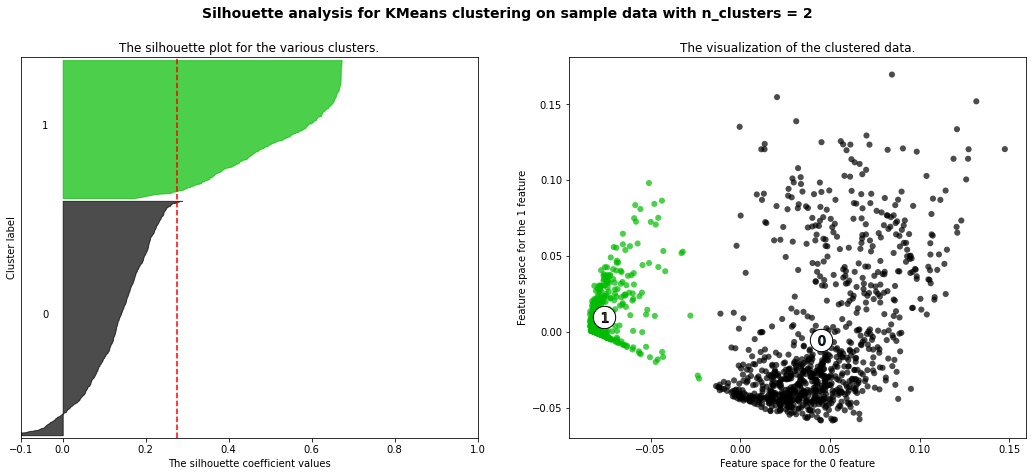

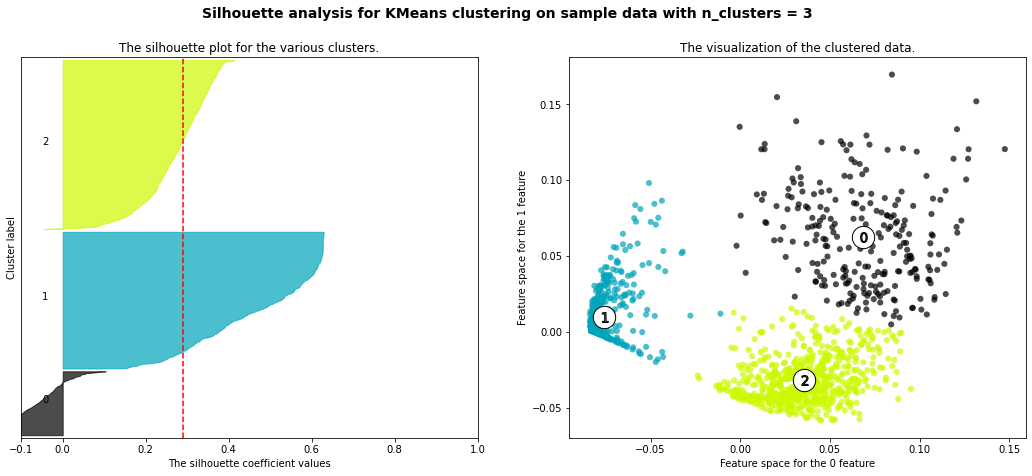

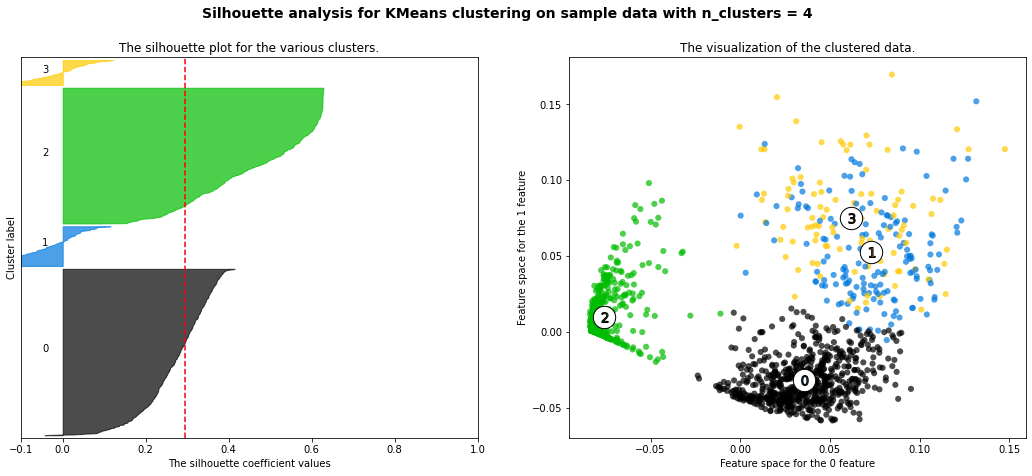

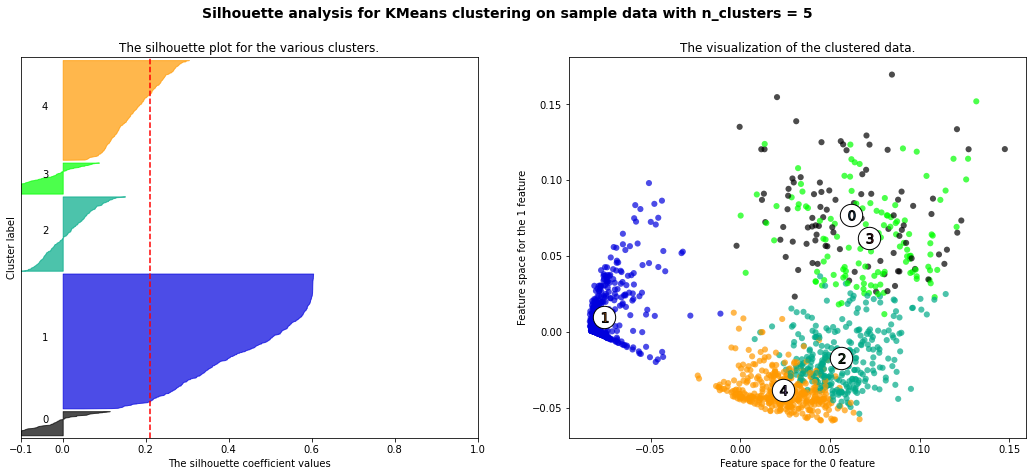

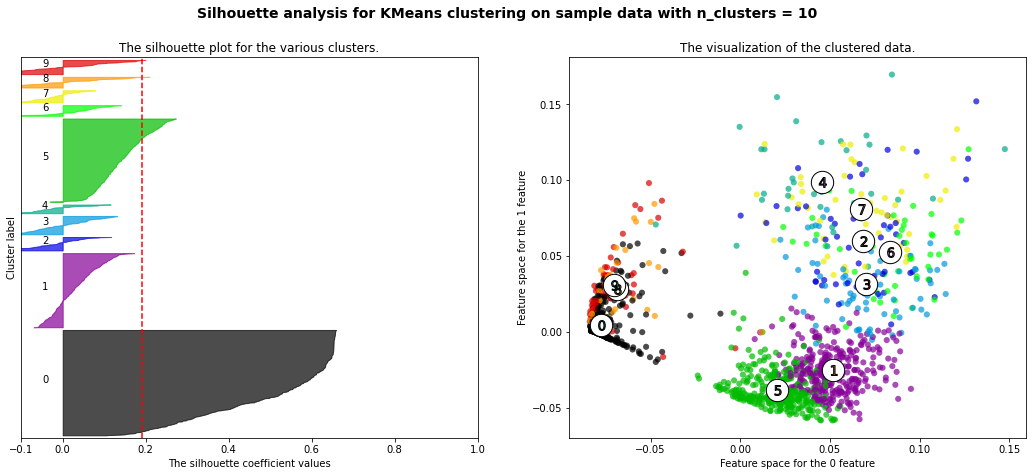

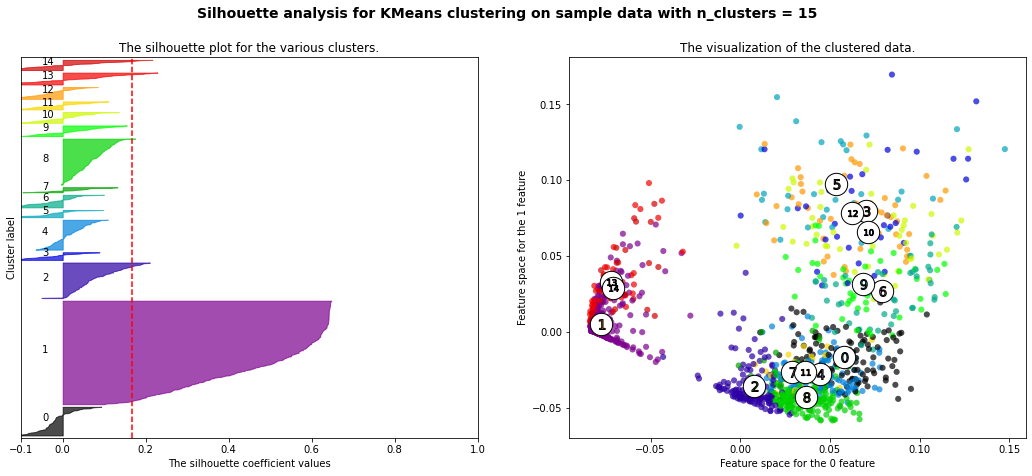

In [13]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     clusterer = AffinityPropagation()
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plot_dim0=0
    plot_dim1=1
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, plot_dim0], X[:, plot_dim1], marker='.', s=150, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, plot_dim0], centers[:, plot_dim1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[plot_dim0], c[plot_dim1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the %i feature"%plot_dim0)
    ax2.set_ylabel("Feature space for the %i feature"%plot_dim1)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


In [14]:
clusterer = KMeans(n_clusters=3, random_state=100)
cluster_labels = clusterer.fit_predict(X

In [15]:
cluster_labels.shape

(1425,)

In [16]:
X.shape

(1425, 221)

In [17]:
X_orig.shape

(1425, 3136)

In [24]:
images_cluster0= images[cluster_labels==0]
images_cluster1= images[cluster_labels==1]
images_cluster2= images[cluster_labels==2]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


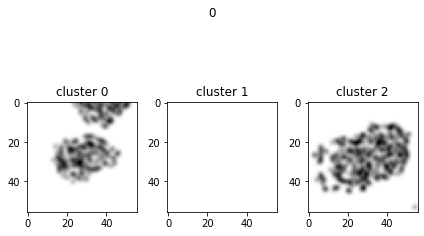

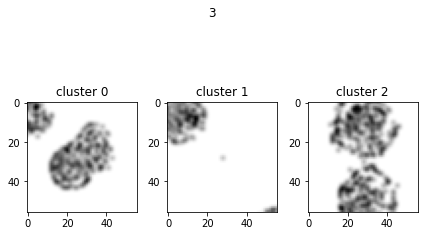

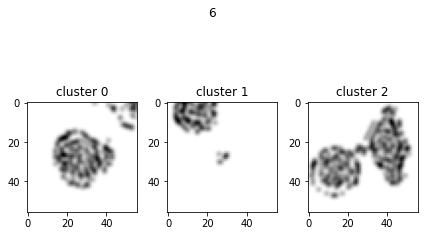

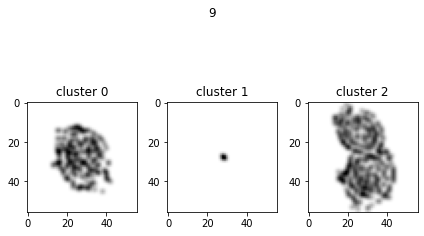

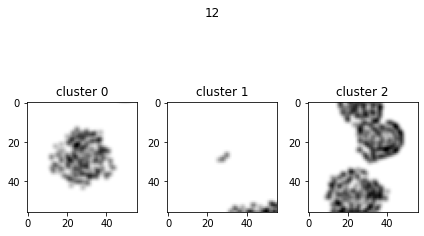

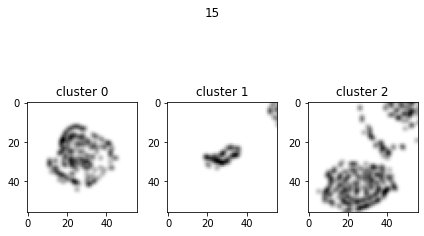

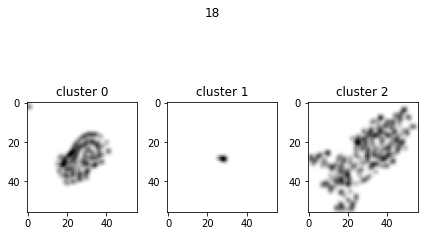

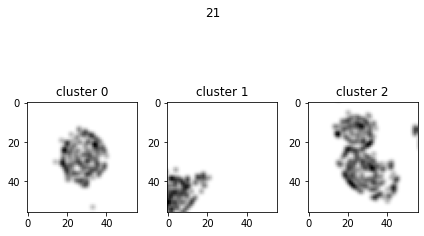

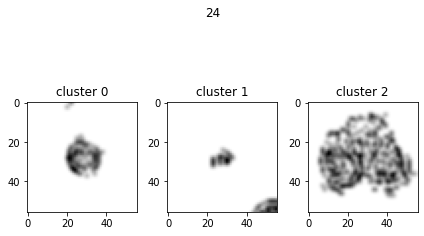

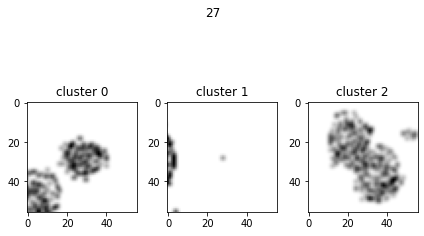

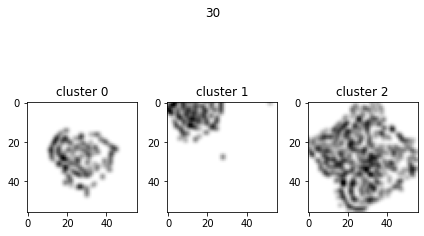

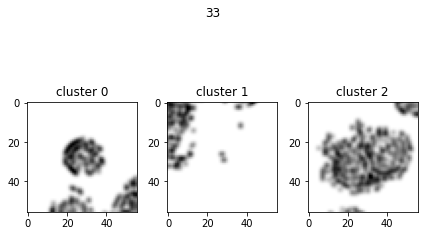

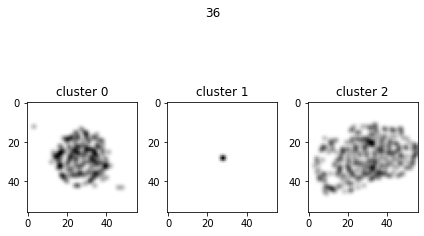

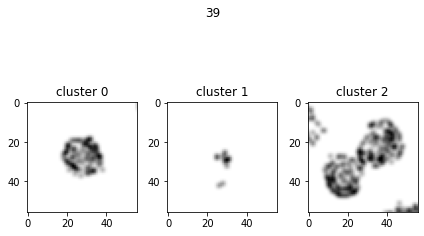

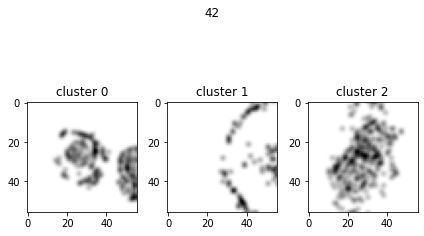

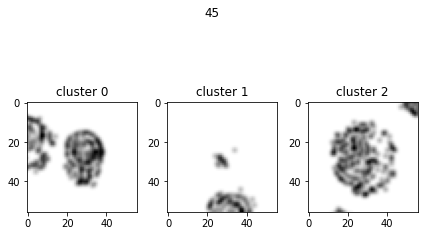

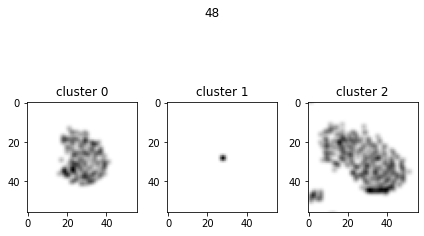

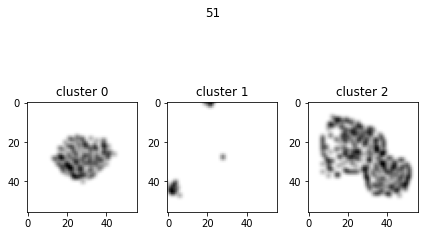

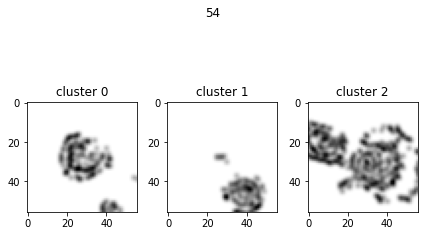

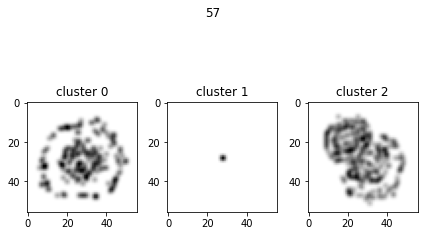

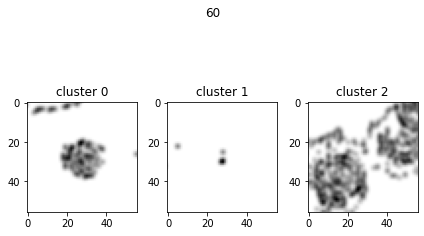

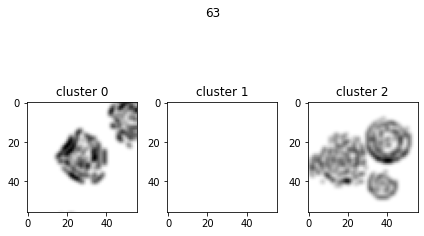

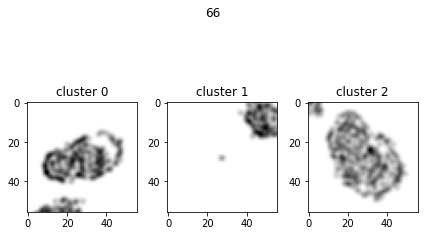

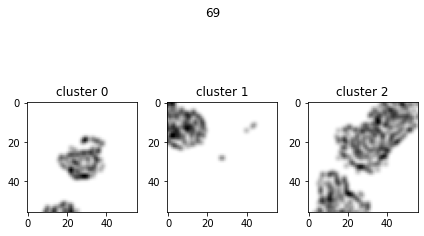

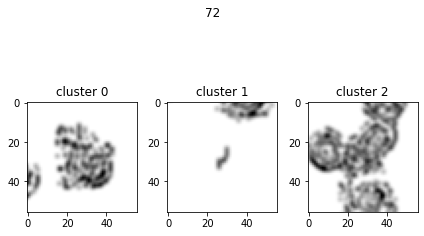

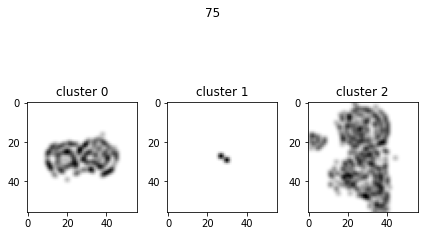

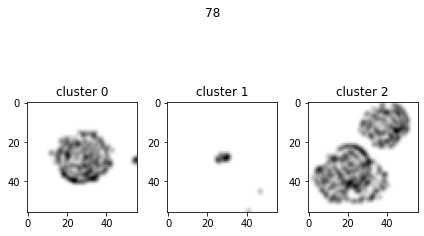

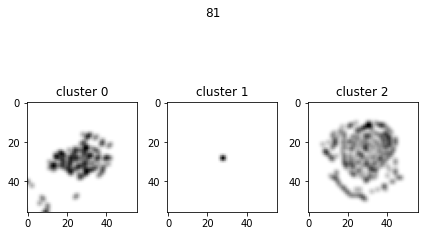

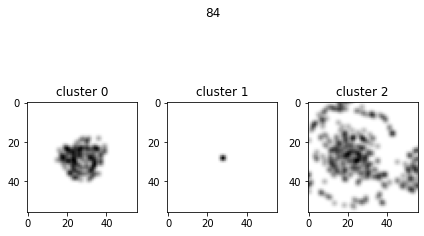

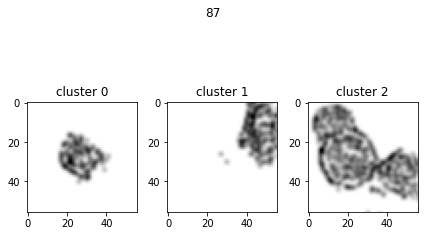

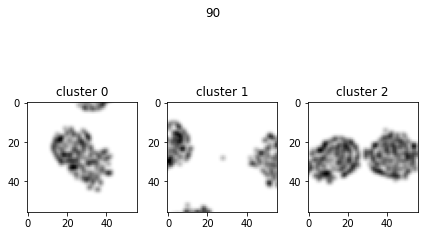

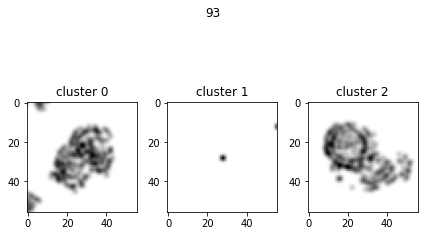

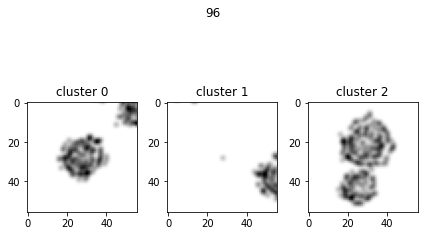

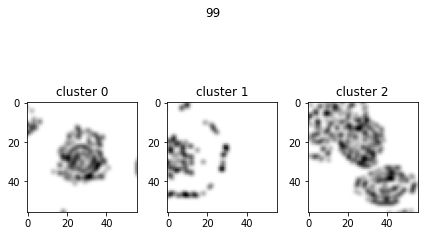

In [33]:

for ix in range(0,100,3):
    plt.figure()
    plt.suptitle(str(ix))#
    plt.subplot(131)
    plt.imshow(images_cluster0[ix],cmap='binary')
    plt.title("cluster 0")
    plt.subplot(132)
    plt.title("cluster 1")
    plt.imshow(images_cluster1[ix],cmap='binary')
    plt.subplot(133)
    plt.title("cluster 2")
    plt.imshow(images_cluster2[ix],cmap='binary')
    plt.tight_layout()
